In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
df.info()  # to check if there are any null values, here all are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

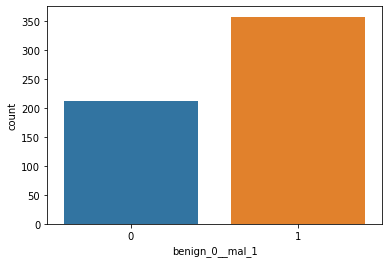

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

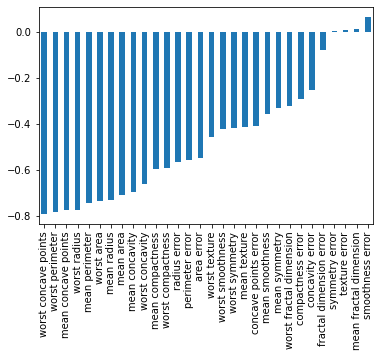

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')  #correlation wrt the feature we are gonna predict, [:-1] is to drop the same value which will be obv correlated as 1

<AxesSubplot:>

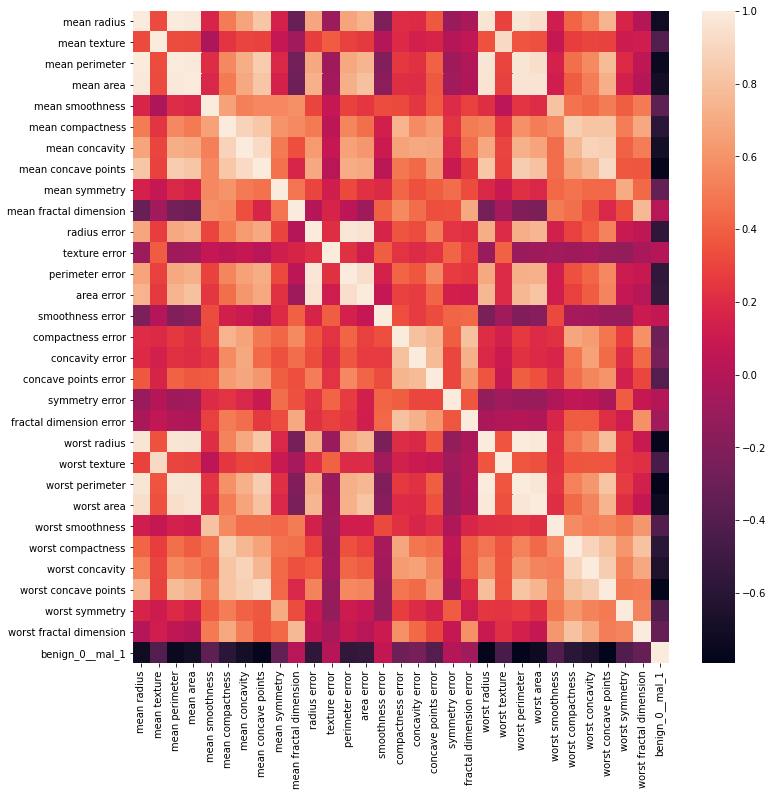

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

## Below is how to prevent overfitting, overrun on the dataset

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense, Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION (coz either melagnin or benign)
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6911 - val_loss: 0.6767
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6617 - val_loss: 0.6523
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6348 - val_loss: 0.6211
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5965 - val_loss: 0.5765
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5415 - val_loss: 0.5099
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4771 - val_loss: 0.4462
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4246 - val_loss: 0.3900
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3726 - val_loss: 0.3416
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3335 - val_loss: 0.3050
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2994 - val_loss: 0.2735
Epoch 11

In [22]:
losses = pd.DataFrame(model.history.history)

In [23]:
losses

,loss,val_loss
0,0.691083,0.676720
1,0.661688,0.652319
2,0.634759,0.621116
3,0.596528,0.576513
4,0.541505,0.509890
...,...,...
595,0.003309,0.262501
596,0.002814,0.230333
597,0.002273,0.250587
598,0.002239,0.233876


<AxesSubplot:>

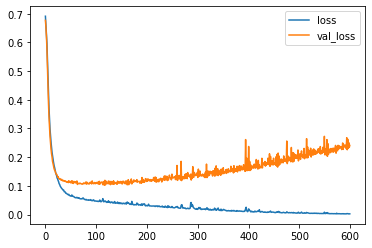

In [24]:
losses.plot()    # This is the perfect example of overfitting, coz we are using too many epochs so, we try to use early stop

In [25]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION (coz either melagnin or benign)
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose =1, patience=25)  # here our metric is loss so we want to minimise it, if it was accuracy we would max it

In [29]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6975 - val_loss: 0.6823
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6668 - val_loss: 0.6566
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6364 - val_loss: 0.6199
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5991 - val_loss: 0.5787
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5559 - val_loss: 0.5311
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5078 - val_loss: 0.4801
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4539 - val_loss: 0.4258
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3990 - val_loss: 0.3689
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3463 - val_loss: 0.3175
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3006 - val_loss: 0.2780
Epoch 11/

<AxesSubplot:>

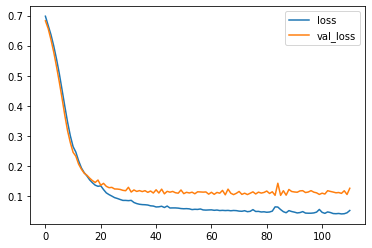

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [31]:
# Another thing we can do is to add dropout layers to prevent over fitting
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))                   # half of the neurons will be turned off randomly during each batch
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION (coz either melagnin or benign)
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6647 - val_loss: 0.6327
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6362 - val_loss: 0.5964
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6039 - val_loss: 0.5641
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5594 - val_loss: 0.5262
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5259 - val_loss: 0.4859
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5076 - val_loss: 0.4456
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4636 - val_loss: 0.4129
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4305 - val_loss: 0.3779
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4088 - val_loss: 0.3458
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3926 - val_loss: 0.3230
Epoch 11

In [34]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

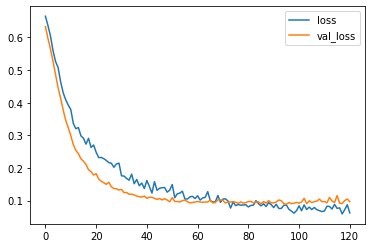

In [36]:
model_loss.plot()

In [39]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [42]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
